In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error

from get_player_gamelogs import *
from get_similar_players import *
from get_team_logs import *


In [2]:
player_stats = get_player_stats()
player_id = get_player_id(player_stats)

In [3]:
active_players= get_active_players_data()
filtered_players= filter_similar_players(active_players,player_id,30)
filtered_players_id=get_filtered_players_id(filtered_players)
similar_player_stats=get_similar_players_stats(filtered_players_id)

In [4]:

games= get_games_since_2018()

In [41]:
atl=games[0]
atl

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,22024,1610612737,ATL,Atlanta Hawks,1522400064,2024-07-20,ATL vs. NYK,L,201,82,...,0.667,14,25,39,19,7.0,3,17,25,-6.6
1,22024,1610612737,ATL,Atlanta Hawks,1522400055,2024-07-19,ATL @ CHI,L,210,99,...,0.810,8,29,37,25,8.0,5,26,28,-4.0
2,22024,1610612737,ATL,Atlanta Hawks,1522400044,2024-07-17,ATL vs. LAL,L,200,86,...,0.750,10,28,38,19,7.0,6,17,17,4.0
3,22024,1610612737,ATL,Atlanta Hawks,1522400021,2024-07-14,ATL vs. SAS,L,199,76,...,0.615,15,27,42,16,9.0,6,16,21,-3.0
4,22024,1610612737,ATL,Atlanta Hawks,1522400006,2024-07-12,ATL @ WAS,L,201,88,...,0.600,7,34,41,14,10.0,8,14,23,-10.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,22018,1610612737,ATL,Atlanta Hawks,1521800024,2018-07-08,ATL vs. POR,L,198,68,...,0.615,9,34,43,18,11.0,7,15,17,-17.0
559,22018,1610612737,ATL,Atlanta Hawks,1521800014,2018-07-07,ATL vs. NYK,L,200,89,...,0.591,16,35,51,22,7.0,5,16,29,-6.0
560,22018,1610612737,ATL,Atlanta Hawks,1621800006,2018-07-05,ATL @ UTA,L,201,87,...,0.654,15,33,48,16,11.0,5,17,25,2.2
561,22018,1610612737,ATL,Atlanta Hawks,1621800003,2018-07-03,ATL vs. SAS,L,200,81,...,0.545,14,29,43,12,9.0,2,12,25,-26.2


In [20]:
wps=player_stats
def extract_opponent(matchup):
    teams = matchup.split(" @ ")
    if len(teams) == 2:
        return teams[1]
    teams = matchup.split(" vs. ")
    if len(teams) == 2:
        return teams[1]
    return None
wps['Opponent'] = wps['MATCHUP'].apply(extract_opponent)


In [21]:
wps['Opponent'] = wps['MATCHUP'].apply(extract_opponent)

In [22]:
player_stats.dtypes

SEASON_ID           object
Player_ID            int64
Game_ID             object
GAME_DATE           object
MATCHUP             object
WL                  object
MIN                  int64
FGM                  int64
FGA                  int64
FG_PCT             float64
FG3M                 int64
FG3A                 int64
FG3_PCT            float64
FTM                  int64
FTA                  int64
FT_PCT             float64
OREB                 int64
DREB                 int64
REB                  int64
AST                  int64
STL                  int64
BLK                  int64
TOV                  int64
PF                   int64
PTS                  int64
PLUS_MINUS           int64
VIDEO_AVAILABLE      int64
Opponent            object
dtype: object

In [30]:
# Build Data Source 1 - Keeping all that is relevant 
wps = player_stats
wpsml = wps.drop(columns=["SEASON_ID","Player_ID","Game_ID","GAME_DATE","MATCHUP","VIDEO_AVAILABLE"])
wpsml = pd.get_dummies(data=wpsml,columns=["WL","Opponent"])

In [10]:
from sklearn.model_selection import train_test_split

In [31]:
wpsml

,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,...,Opponent_NYK,Opponent_OKC,Opponent_ORL,Opponent_PHI,Opponent_POR,Opponent_SAC,Opponent_SAS,Opponent_TOR,Opponent_UTA,Opponent_WAS
0,36,6,16,0.375,3,8,0.375,8,10,0.800,...,0,0,0,0,0,0,0,0,0,0
1,41,7,12,0.583,2,4,0.500,5,5,1.000,...,0,0,0,0,0,1,0,0,0,0
2,39,13,24,0.542,5,12,0.417,6,6,1.000,...,0,0,0,0,0,0,0,0,0,0
3,40,1,11,0.091,0,4,0.000,10,11,0.909,...,0,0,0,0,0,0,0,0,0,0
4,39,9,16,0.563,0,6,0.000,7,8,0.875,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,40,8,21,0.381,2,7,0.286,8,8,1.000,...,0,0,0,0,0,0,0,0,1,0
64,32,7,15,0.467,2,3,0.667,8,10,0.800,...,0,0,0,0,0,0,0,0,1,0
65,26,12,22,0.545,2,7,0.286,5,5,1.000,...,0,0,0,0,0,0,0,0,0,0
66,35,10,19,0.526,5,7,0.714,6,6,1.000,...,0,0,0,0,0,0,1,0,0,0


In [12]:
wps.corr()

/var/folders/6h/jfqddf4979v3__m65vbr8r2m0000gn/T/ipykernel_19439/3839948271.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  wps.corr()


,Player_ID,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
Player_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MIN,NaN,1.000000,0.286758,0.393046,0.117115,0.121900,0.327663,-0.097010,0.150946,0.187463,...,0.224179,0.160440,0.210150,0.008538,0.241633,0.135728,0.184363,0.297874,-0.086261,NaN
FGM,NaN,0.286758,1.000000,0.840481,0.749725,0.617174,0.600702,0.283380,0.097793,0.119936,...,0.082620,0.059276,-0.198682,-0.050657,0.390943,0.062181,-0.192809,0.939448,0.157656,NaN
FGA,NaN,0.393046,0.840481,1.000000,0.310861,0.423777,0.596535,0.017365,0.143300,0.139362,...,0.159430,0.153535,-0.110333,-0.039753,0.510604,-0.047024,-0.259530,0.791605,0.147058,NaN
FG_PCT,NaN,0.117115,0.749725,0.310861,1.000000,0.547045,0.330905,0.480166,-0.029711,0.017792,...,-0.006005,-0.048379,-0.182274,-0.080995,0.085855,0.142313,0.057334,0.687313,0.059983,NaN
FG3M,NaN,0.121900,0.617174,0.423777,0.547045,1.000000,0.769723,0.633395,0.067945,0.031630,...,0.049767,0.012183,-0.145981,-0.072745,0.142192,0.097533,-0.003011,0.693451,0.245867,NaN
FG3A,NaN,0.327663,0.600702,0.596535,0.330905,0.769723,1.000000,0.106905,-0.044947,-0.080088,...,0.057602,0.021478,-0.111065,-0.050081,0.238686,-0.028519,-0.185805,0.603663,0.207912,NaN
FG3_PCT,NaN,-0.097010,0.283380,0.017365,0.480166,0.633395,0.106905,1.000000,0.092750,0.085084,...,0.196838,0.167564,-0.050239,-0.014616,0.048204,0.279111,0.240929,0.368942,0.214344,NaN
FTM,NaN,0.150946,0.097793,0.143300,-0.029711,0.067945,-0.044947,0.092750,1.000000,0.963865,...,0.058882,0.046868,0.073559,-0.011574,0.116438,0.083305,-0.069658,0.402525,0.011700,NaN
FTA,NaN,0.187463,0.119936,0.139362,0.017792,0.031630,-0.080088,0.085084,0.963865,1.000000,...,0.044552,0.036783,0.072628,0.023336,0.131214,0.055978,-0.066088,0.402383,-0.022468,NaN


In [23]:
player_stats

,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,FG_PCT,...,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,Opponent
0,22023,1626164,0022301194,"APR 14, 2024",PHX @ MIN,W,36,6,16,0.375,...,4,7,1,0,1,3,23,20,1,MIN
1,22023,1626164,0022301185,"APR 12, 2024",PHX @ SAC,W,41,7,12,0.583,...,4,6,0,0,4,5,21,-1,1,SAC
2,22023,1626164,0022301165,"APR 10, 2024",PHX @ LAC,W,39,13,24,0.542,...,1,4,1,1,1,1,37,9,1,LAC
3,22023,1626164,0022301156,"APR 09, 2024",PHX vs. LAC,L,40,1,11,0.091,...,3,5,2,0,3,2,12,-7,1,LAC
4,22023,1626164,0022301138,"APR 07, 2024",PHX vs. NOP,L,39,9,16,0.563,...,3,7,1,0,4,3,25,-6,1,NOP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,22023,1626164,0022300214,"NOV 19, 2023",PHX @ UTA,W,40,8,21,0.381,...,5,8,0,1,3,5,26,2,1,UTA
64,22023,1626164,0022300035,"NOV 17, 2023",PHX @ UTA,W,32,7,15,0.467,...,4,15,0,0,1,3,24,9,1,UTA
65,22023,1626164,0022300197,"NOV 15, 2023",PHX vs. MIN,W,26,12,22,0.545,...,4,5,0,0,2,2,31,0,1,MIN
66,22023,1626164,0022300131,"NOV 02, 2023",PHX vs. SAS,L,35,10,19,0.526,...,9,13,0,0,5,4,31,-2,1,SAS


/var/folders/6h/jfqddf4979v3__m65vbr8r2m0000gn/T/ipykernel_19439/3059242264.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=wps.corr()


<Axes: >

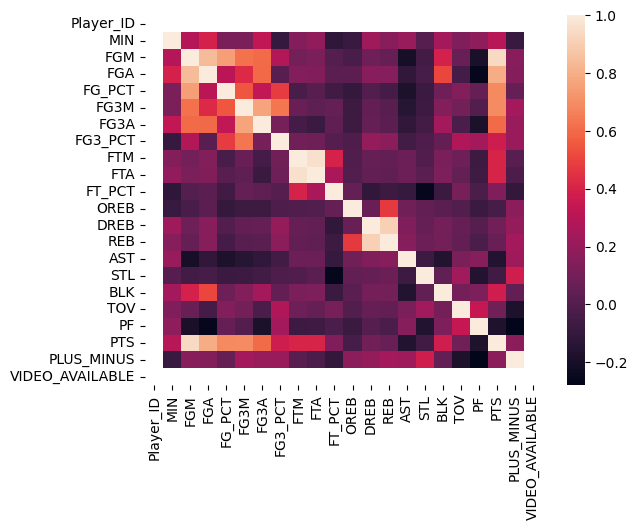

In [13]:
import seaborn as sns
corr=wps.corr()

sns.heatmap(data=corr)


In [14]:
y = wpsml["PTS"]
x = wpsml.drop(columns=["PTS"])
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=23)
model = LinearRegression().fit(xtrain,ytrain)
y_pred = model.predict(xtest)
print(y_pred)
print(ytest)

[31. 14. 17. 31. 25. 34.  8. 52. 28. 62. 24. 21. 27. 22.]
65    31
8     14
9     17
66    31
4     25
38    34
58     8
7     52
52    28
32    62
18    24
20    21
17    27
30    22
Name: PTS, dtype: int64


In [40]:
# Build Data Source 2
wpsml.columns.to_list()
y = wpsml["PTS"]
x = wpsml.drop(columns=['MIN',
 'FGM',
 'FGA',
 'FG_PCT',
 'FG3M',
 'FG3A',
 'FG3_PCT',
 'FTM',
 'FTA',
 'FT_PCT',
 'OREB',
 'DREB',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'PLUS_MINUS',
 'WL_L',
 'WL_W',
 'Opponent_ATL',
 'Opponent_BKN',
 'Opponent_BOS',
 'Opponent_CHA',
 'Opponent_CHI',
 'Opponent_CLE',
 'Opponent_DAL',
 'Opponent_DEN',
 'Opponent_DET',
 'Opponent_GSW',
 'Opponent_HOU',
 'Opponent_IND',
 'Opponent_LAC',
 'Opponent_LAL',
 'Opponent_MEM',
 'Opponent_MIA',
 'Opponent_MIL',
 'Opponent_MIN',
 'Opponent_NOP',
 'Opponent_NYK',
 'Opponent_OKC',
 'Opponent_ORL',
 'Opponent_PHI',
 'Opponent_POR',
 'Opponent_SAC',
 'Opponent_SAS',
 'Opponent_TOR',
 'Opponent_UTA',
 'Opponent_WAS'])
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=24)
model = LinearRegression().fit(xtrain,ytrain)
y_pred = model.predict(xtest)
print(ytest)
print(y_pred)


48    20
22    35
14    23
24    25
16    23
52    28
19    35
41    24
67    32
23     7
2     37
45    21
54    32
29    22
Name: PTS, dtype: int64
[24.30993327 26.54124543 29.24508147 25.18932741 26.71185377 24.95306548
 31.41074004 25.35993575 26.77750737 31.75195671 29.11377427 28.94316594
 27.18437764 26.06872156]


In [16]:
#Build Data Source 3
